# GPA-5 Prediction for SSC in Bangladesh 

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Importing dataset
df = pd.read_csv('gpa5.csv')

In [3]:
df

,year,students
0,2001,76
1,2002,327
2,2003,1389
3,2004,8597
4,2005,15631
5,2006,24384
6,2007,25732
7,2008,41917
8,2009,45934
9,2010,52134


In [4]:
#Shape of the datset
df.shape

(22, 2)

In [5]:
#Null Value Checking
df.isnull().sum()

year        0
students    0
dtype: int64

Text(0, 0.5, 'No. of Students got GPA-5')

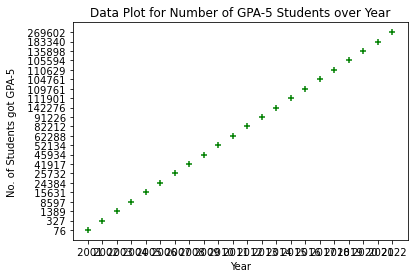

In [6]:
#Scatter Plot
plt.scatter(df['year'], df['students'], marker = '+', color = 'green')
plt.title('Data Plot for Number of GPA-5 Students over Year')
plt.xlabel('Year')
plt.ylabel('No. of Students got GPA-5')

# Dividing the Dataset into Feature and labels

In [7]:
x = df[['year']]
y = df[['students']]

# Splitting the Dataset into Train and Testing

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state = 1)

# Model Developing using Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [12]:
lr.predict(xtest)

array([[166422.89423217],
       [136321.43011768],
       [  5881.75228824]])

In [13]:
lr.predict([[2023]])

array([[196524.35834665]])

In [14]:
lr.score(xtest, ytest)

0.7802784905551307

# Model Developing using Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

C:\Users\user\AppData\Local\Temp/ipykernel_13348/3889765417.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


RandomForestRegressor()

In [17]:
rfr.predict(xtest)

array([131122.32, 110095.34,   6242.68])

In [18]:
rfr.score(xtest, ytest)

0.9935503866025759

# Model Developing using Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dtr = DecisionTreeRegressor()

In [21]:
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [22]:
dtr.predict(xtest)

array([105594., 109761.,   1389.])

In [23]:
dtr.score(xtest, ytest)

0.886995747047605